## Essai IA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv("chansons.csv")
dataset.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [4]:
X = dataset[['duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
y = dataset['popularity']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Test Arbre Décisionnel

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [7]:
y_pred = regressor.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [52.  0. 12. ...  5.  0. 41.]


In [8]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
485103,36,52.0
5066,0,0.0
160843,2,12.0
287216,0,4.0
16608,0,12.0
...,...,...
323818,51,50.0
125480,11,36.0
124204,0,5.0
10001,0,0.0


In [9]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.441548613842874
Mean Squared Error: 410.94517462449596
Root Mean Squared Error: 20.27178271944764


In [10]:
dataset = dataset[dataset.popularity != 0]

In [11]:
dataset

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
13,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,186800,0,['Lucien Boyer'],['4mSouLpNSEY1d7OdIjlFiP'],1922,0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.1630,0.8970,127.531,4
26,112adU33vo4C1eRZct2hWy,Nuits De Chine,4,180800,0,['Louis Lynel'],['28pbIiOohRRZjqpAM9iqYM'],1922,0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.1960,0.4000,139.575,3
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.1830,0.2110,89.822,4
150,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.2040,0.9010,104.606,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [12]:
dataset = dataset[dataset.duration_ms < 1000000]

In [13]:
dataset.sort_values(by = 'duration_ms', ascending = False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
440179,2PQy1fs2pN5VgvIDxCcLuY,Opposite People,23,999133,0,['Fela Kuti'],['5CG9X521RDFWCuAhlo6QoR'],1977,0.666,0.9010,5,-5.156,0,0.1700,0.1110,0.060800,0.1240,0.902,118.050,4
235952,1Rez83kRG4Wa5HIdgLAEh0,"Popurri, pt. 1 (La Tos / Me Llaman el Asesino ...",14,998922,0,['Marimba Sonora Quetzal'],['1C5JXVn4cUib3RTPDqf4hv'],1998-01-31,0.600,0.5050,0,-11.071,1,0.0739,0.1380,0.732000,0.0985,0.691,110.347,4
181297,7wOFNbfsc7hlUczIAGl5je,Opposite People,14,998280,0,"['Fela Kuti', 'Afrika 70']","['5CG9X521RDFWCuAhlo6QoR', '2DB3LOmYLtB6GmKty4...",1977-01-01,0.678,0.9030,1,-5.162,1,0.1690,0.1040,0.044100,0.1210,0.900,118.114,4
100596,4IDTOyRmdtNt8cNxX9brjY,Opposite People,30,998280,0,['Fela Kuti'],['5CG9X521RDFWCuAhlo6QoR'],1977-01-01,0.674,0.9010,5,-5.161,0,0.1700,0.1030,0.045900,0.1220,0.903,118.063,4
223679,35qm7wlXx7xT20aw6w8eqv,עליסה בארץ הפלאות - סיפור ב',9,996520,0,['Shoshik Shani'],['0m5BX5gCzIkhFjZz7HQAeF'],1984-01-01,0.637,0.0694,1,-19.913,1,0.5780,0.6510,0.000000,0.1990,0.367,86.626,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94216,3H6q53j6bo1r51aotu7Bef,Intro,4,24950,0,['Demi Lovato'],['6S2OmqARrzebs0tKUEyXyp'],2021-04-01,0.611,0.3650,5,-17.697,1,0.9110,0.0405,0.000000,0.2280,0.664,170.421,3
94217,725WRvbXM7ICAguHLLoFPw,Intro,5,24950,0,['Demi Lovato'],['6S2OmqARrzebs0tKUEyXyp'],2021-04-02,0.611,0.3650,5,-17.697,1,0.9110,0.0405,0.000000,0.2280,0.664,170.421,3
400406,0D8iWrbPBYovskpsusM97I,INTRO,11,23534,1,['PSICOLOGI'],['0fskdccy6fvnWMNMNPqEro'],2021-04-01,0.698,0.4510,2,-13.629,0,0.9390,0.5990,0.000000,0.3760,0.924,136.352,5
314717,6vBXZzUuaUatVmAQL1NV75,Bræður tveir,1,23220,0,"['Leikhópurinn Karíus', 'Baktus']","['5r18zZmQRuVYNMfbeJftBO', '2QTpE4j6oFtjRIz3Cy...",1965-01-01,0.850,0.4070,10,-11.323,1,0.4600,0.9270,0.000000,0.2050,0.987,111.873,4


In [14]:
y[y < 90]=0
y[y >= 90]=1

In [15]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

## Logistic Regression

In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sc

StandardScaler()

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9998892061192313

In [20]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)

In [21]:
dataset.loc[:,"popularity"].describe()

count    540689.000000
mean         29.869725
std          17.246820
min           1.000000
25%          16.000000
50%          29.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

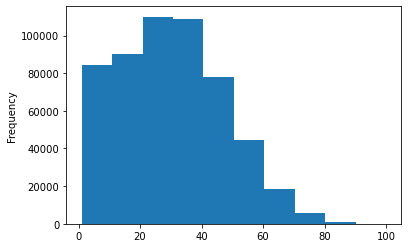

In [22]:
dataset.loc[:,"popularity"].plot.hist()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4544\871209656.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm

<AxesSubplot:>

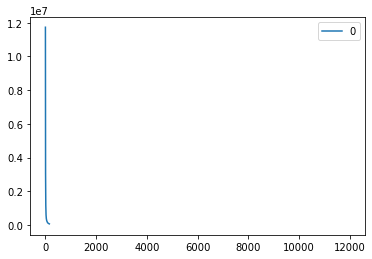

In [43]:
accuracy_array = np.array([0.1])

for i in range(12000):
    y_pred = classifier.predict_proba(X_test)[:,1]
    y_pred [y_pred >= (i/100000)]=1
    y_pred [y_pred < (i/100000)]=0
    cm = confusion_matrix(y_test, y_pred).ravel()
    accuracy = cm[3]/cm[3]+cm[1]*100
    accuracy_array = np.insert(accuracy_array, i , [accuracy],axis = 0)
pd.DataFrame(accuracy_array).plot.line()

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9998892061192313

In [42]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
75631,0,0.0
323365,0,0.0
200980,0,0.0
518638,0,0.0
515311,0,0.0
...,...,...
389147,0,0.0
258347,0,0.0
164626,0,0.0
306829,0,0.0
